In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,8)
plt.rcParams['figure.dpi']=600
%matplotlib inline

!pip install xgboost
from xgboost import XGBClassifier

In [129]:
df=pd.read_csv('/content/Titanic_train.csv')

In [130]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [131]:
# EDA

In [132]:
df.describe(include=object)

Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644

In [133]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [134]:
df

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]

In [135]:
names=df.columns
names

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [136]:
oe=OrdinalEncoder()
data=oe.fit_transform(df)
data

array([[  0.,   2.,   1., ...,   0.,  18.,   2.],
       [  1.,   0.,   0., ...,   0., 207.,   0.],
       [  1.,   2.,   0., ...,   0.,  41.,   2.],
       ...,
       [  0.,   2.,   0., ...,   2., 131.,   2.],
       [  1.,   0.,   1., ...,   0., 153.,   0.],
       [  0.,   2.,   1., ...,   0.,  30.,   1.]])

In [137]:
df=pd.DataFrame(data,columns=names)
df

Survived  Pclass  Sex   Age  SibSp  Parch   Fare  Embarked
0         0.0     2.0  1.0  28.0    1.0    0.0   18.0       2.0
1         1.0     0.0  0.0  51.0    1.0    0.0  207.0       0.0
2         1.0     2.0  0.0  34.0    0.0    0.0   41.0       2.0
3         1.0     0.0  0.0  47.0    1.0    0.0  189.0       2.0
4         0.0     2.0  1.0  47.0    0.0    0.0   43.0       2.0
..        ...     ...  ...   ...    ...    ...    ...       ...
886       0.0     1.0  1.0  35.0    0.0    0.0   85.0       2.0
887       1.0     0.0  0.0  24.0    0.0    0.0  153.0       2.0
888       0.0     2.0  0.0   NaN    1.0    2.0  131.0       2.0
889       1.0     0.0  1.0  34.0    0.0    0.0  153.0       0.0
890       0.0     2.0  1.0  42.0    0.0    0.0   30.0       1.0

[891 rows x 8 columns]

In [138]:
df.describe()

Survived      Pclass         Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  714.000000  891.000000  891.000000   
mean     0.383838    1.308642    0.647587   38.844538    0.507295    0.381594   
std      0.486592    0.836071    0.477990   18.262145    1.005995    0.806057   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    1.000000    0.000000   25.250000    0.000000    0.000000   
50%      0.000000    2.000000    1.000000   36.000000    0.000000    0.000000   
75%      1.000000    2.000000    1.000000   51.000000    1.000000    0.000000   
max      1.000000    2.000000    1.000000   87.000000    6.000000    6.000000   

             Fare    Embarked  
count  891.000000  889.000000  
mean   105.355780    1.535433  
std     70.082521    0.792088  
min      0.000000    0.000000  
25%     40.500000    1.000000  
50%     94.000000    2.000000  
75%    157.000000    2.000000  
max    247.000000    2.000000

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Sex       891 non-null    float64
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    float64
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(8)
memory usage: 55.8 KB


In [140]:
df.shape

(891, 8)

In [141]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [142]:
df=df.dropna()

In [143]:
df.shape

(712, 8)

In [144]:
df.duplicated().sum()

38

In [145]:
df.drop_duplicates(inplace=True)

In [146]:
 # Visualization

<Axes: >

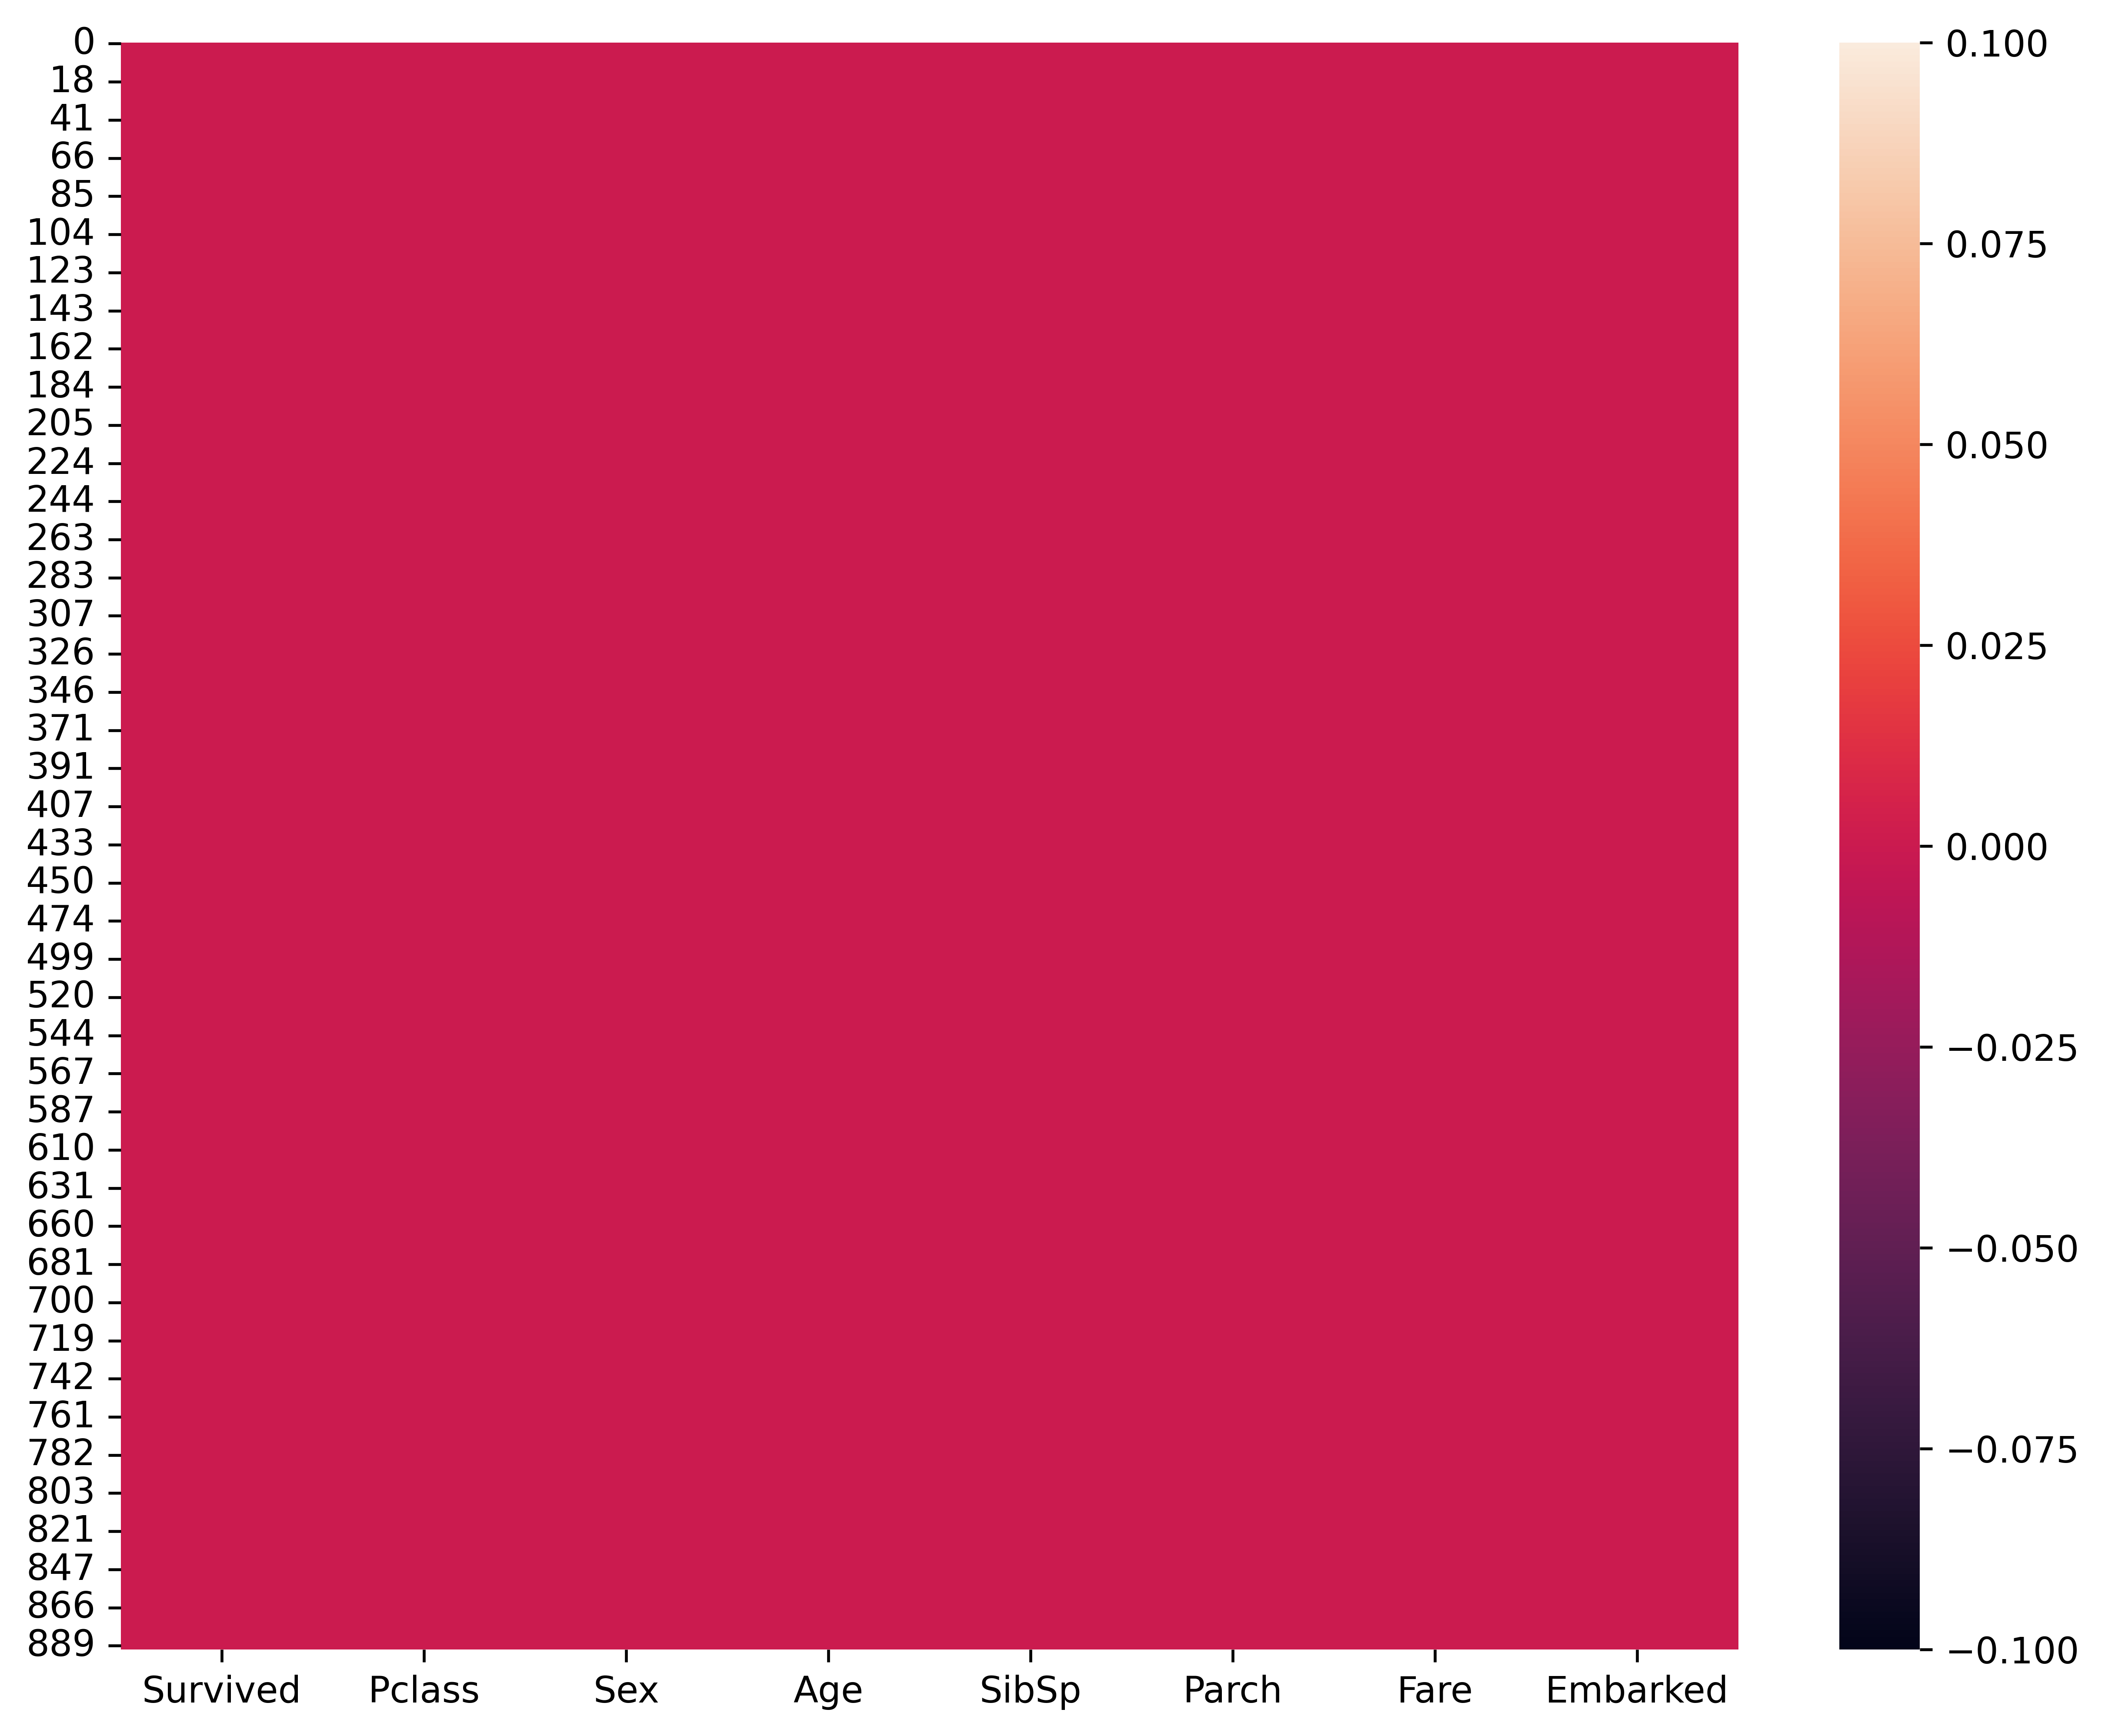

In [147]:
sns.heatmap(df.isna())

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Embarked'}>, <Axes: >]], dtype=object)

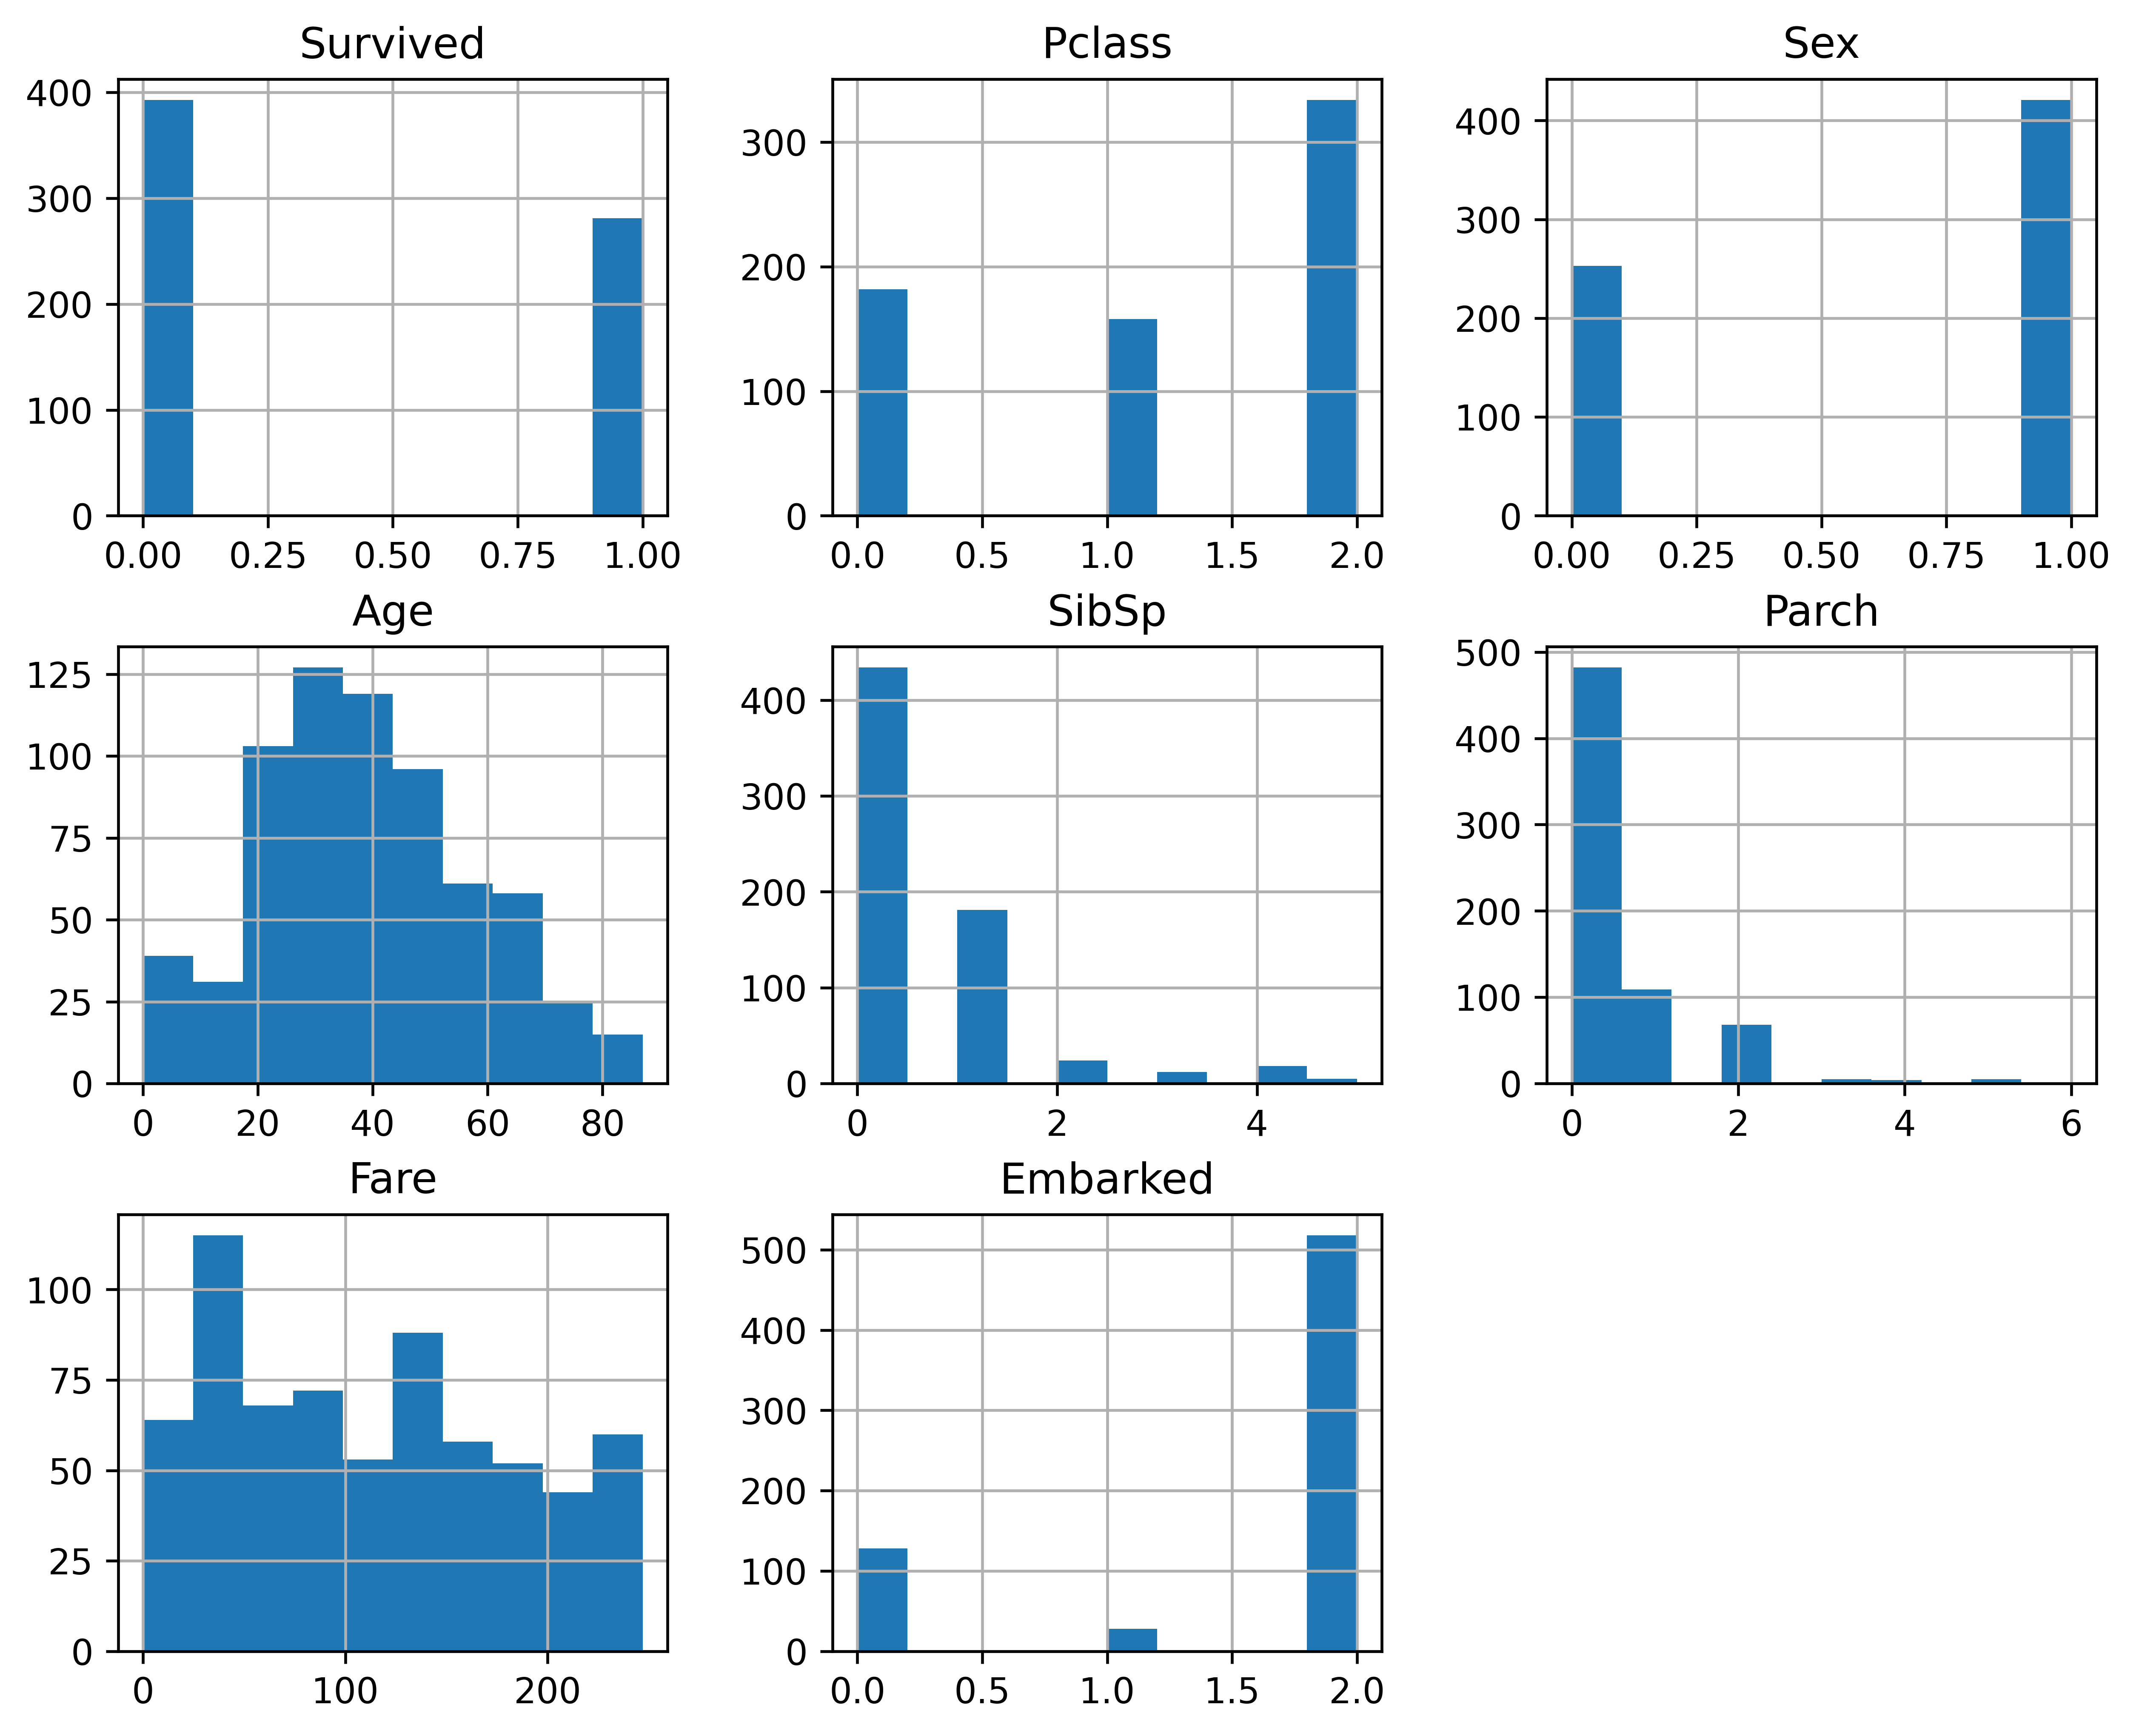

In [148]:
df.hist()

<Axes: >

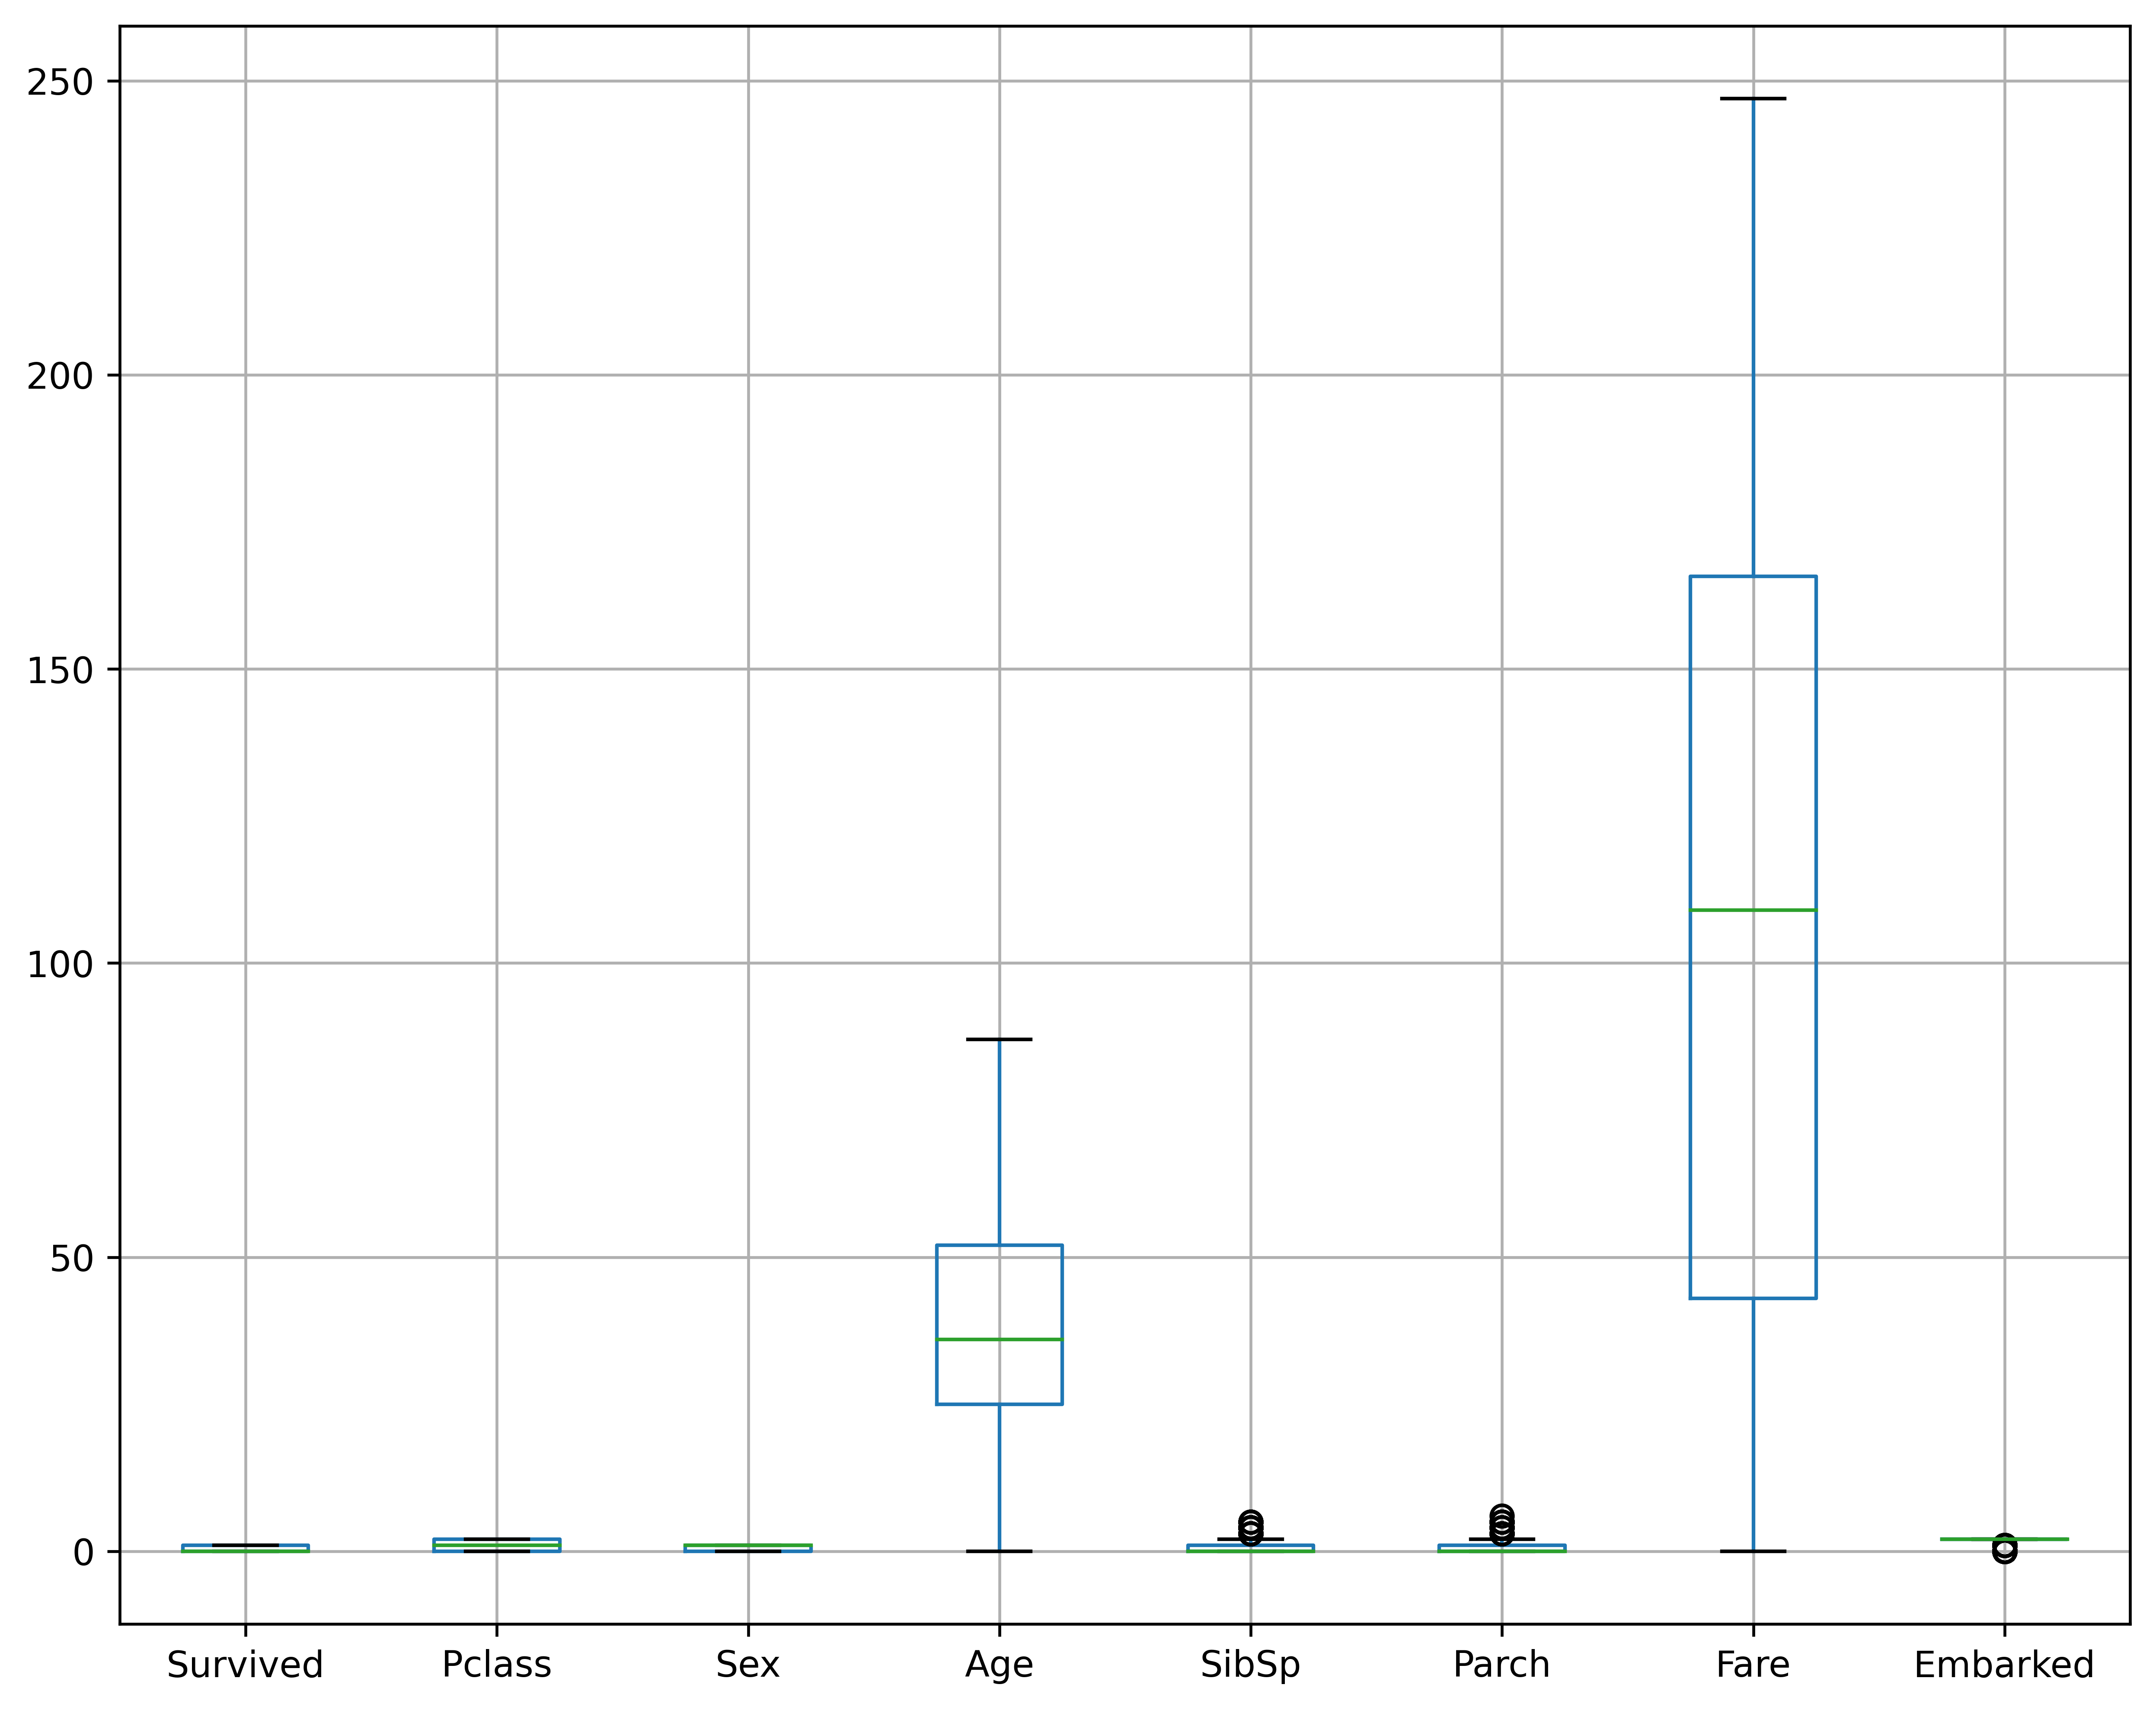

In [149]:
df.boxplot()

In [150]:
sns.pairplot(df,hue='Survived')

In [151]:
df.corr()

Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.353706 -0.519043 -0.085247 -0.034734  0.082956   
Pclass   -0.353706  1.000000  0.137930 -0.367200  0.074853  0.031771   
Sex      -0.519043  0.137930  1.000000  0.102081 -0.091036 -0.241931   
Age      -0.085247 -0.367200  0.102081  1.000000 -0.303591 -0.180672   
SibSp    -0.034734  0.074853 -0.091036 -0.303591  1.000000  0.374674   
Parch     0.082956  0.031771 -0.241931 -0.180672  0.374674  1.000000   
Fare      0.326720 -0.753641 -0.258122  0.124584  0.334131  0.345592   
Embarked -0.166125  0.240116  0.090771 -0.035639  0.050694  0.026663   

              Fare  Embarked  
Survived  0.326720 -0.166125  
Pclass   -0.753641  0.240116  
Sex      -0.258122  0.090771  
Age       0.124584 -0.035639  
SibSp     0.334131  0.050694  
Parch     0.345592  0.026663  
Fare      1.000000 -0.236454  
Embarked -0.236454  1.000000

<Axes: >

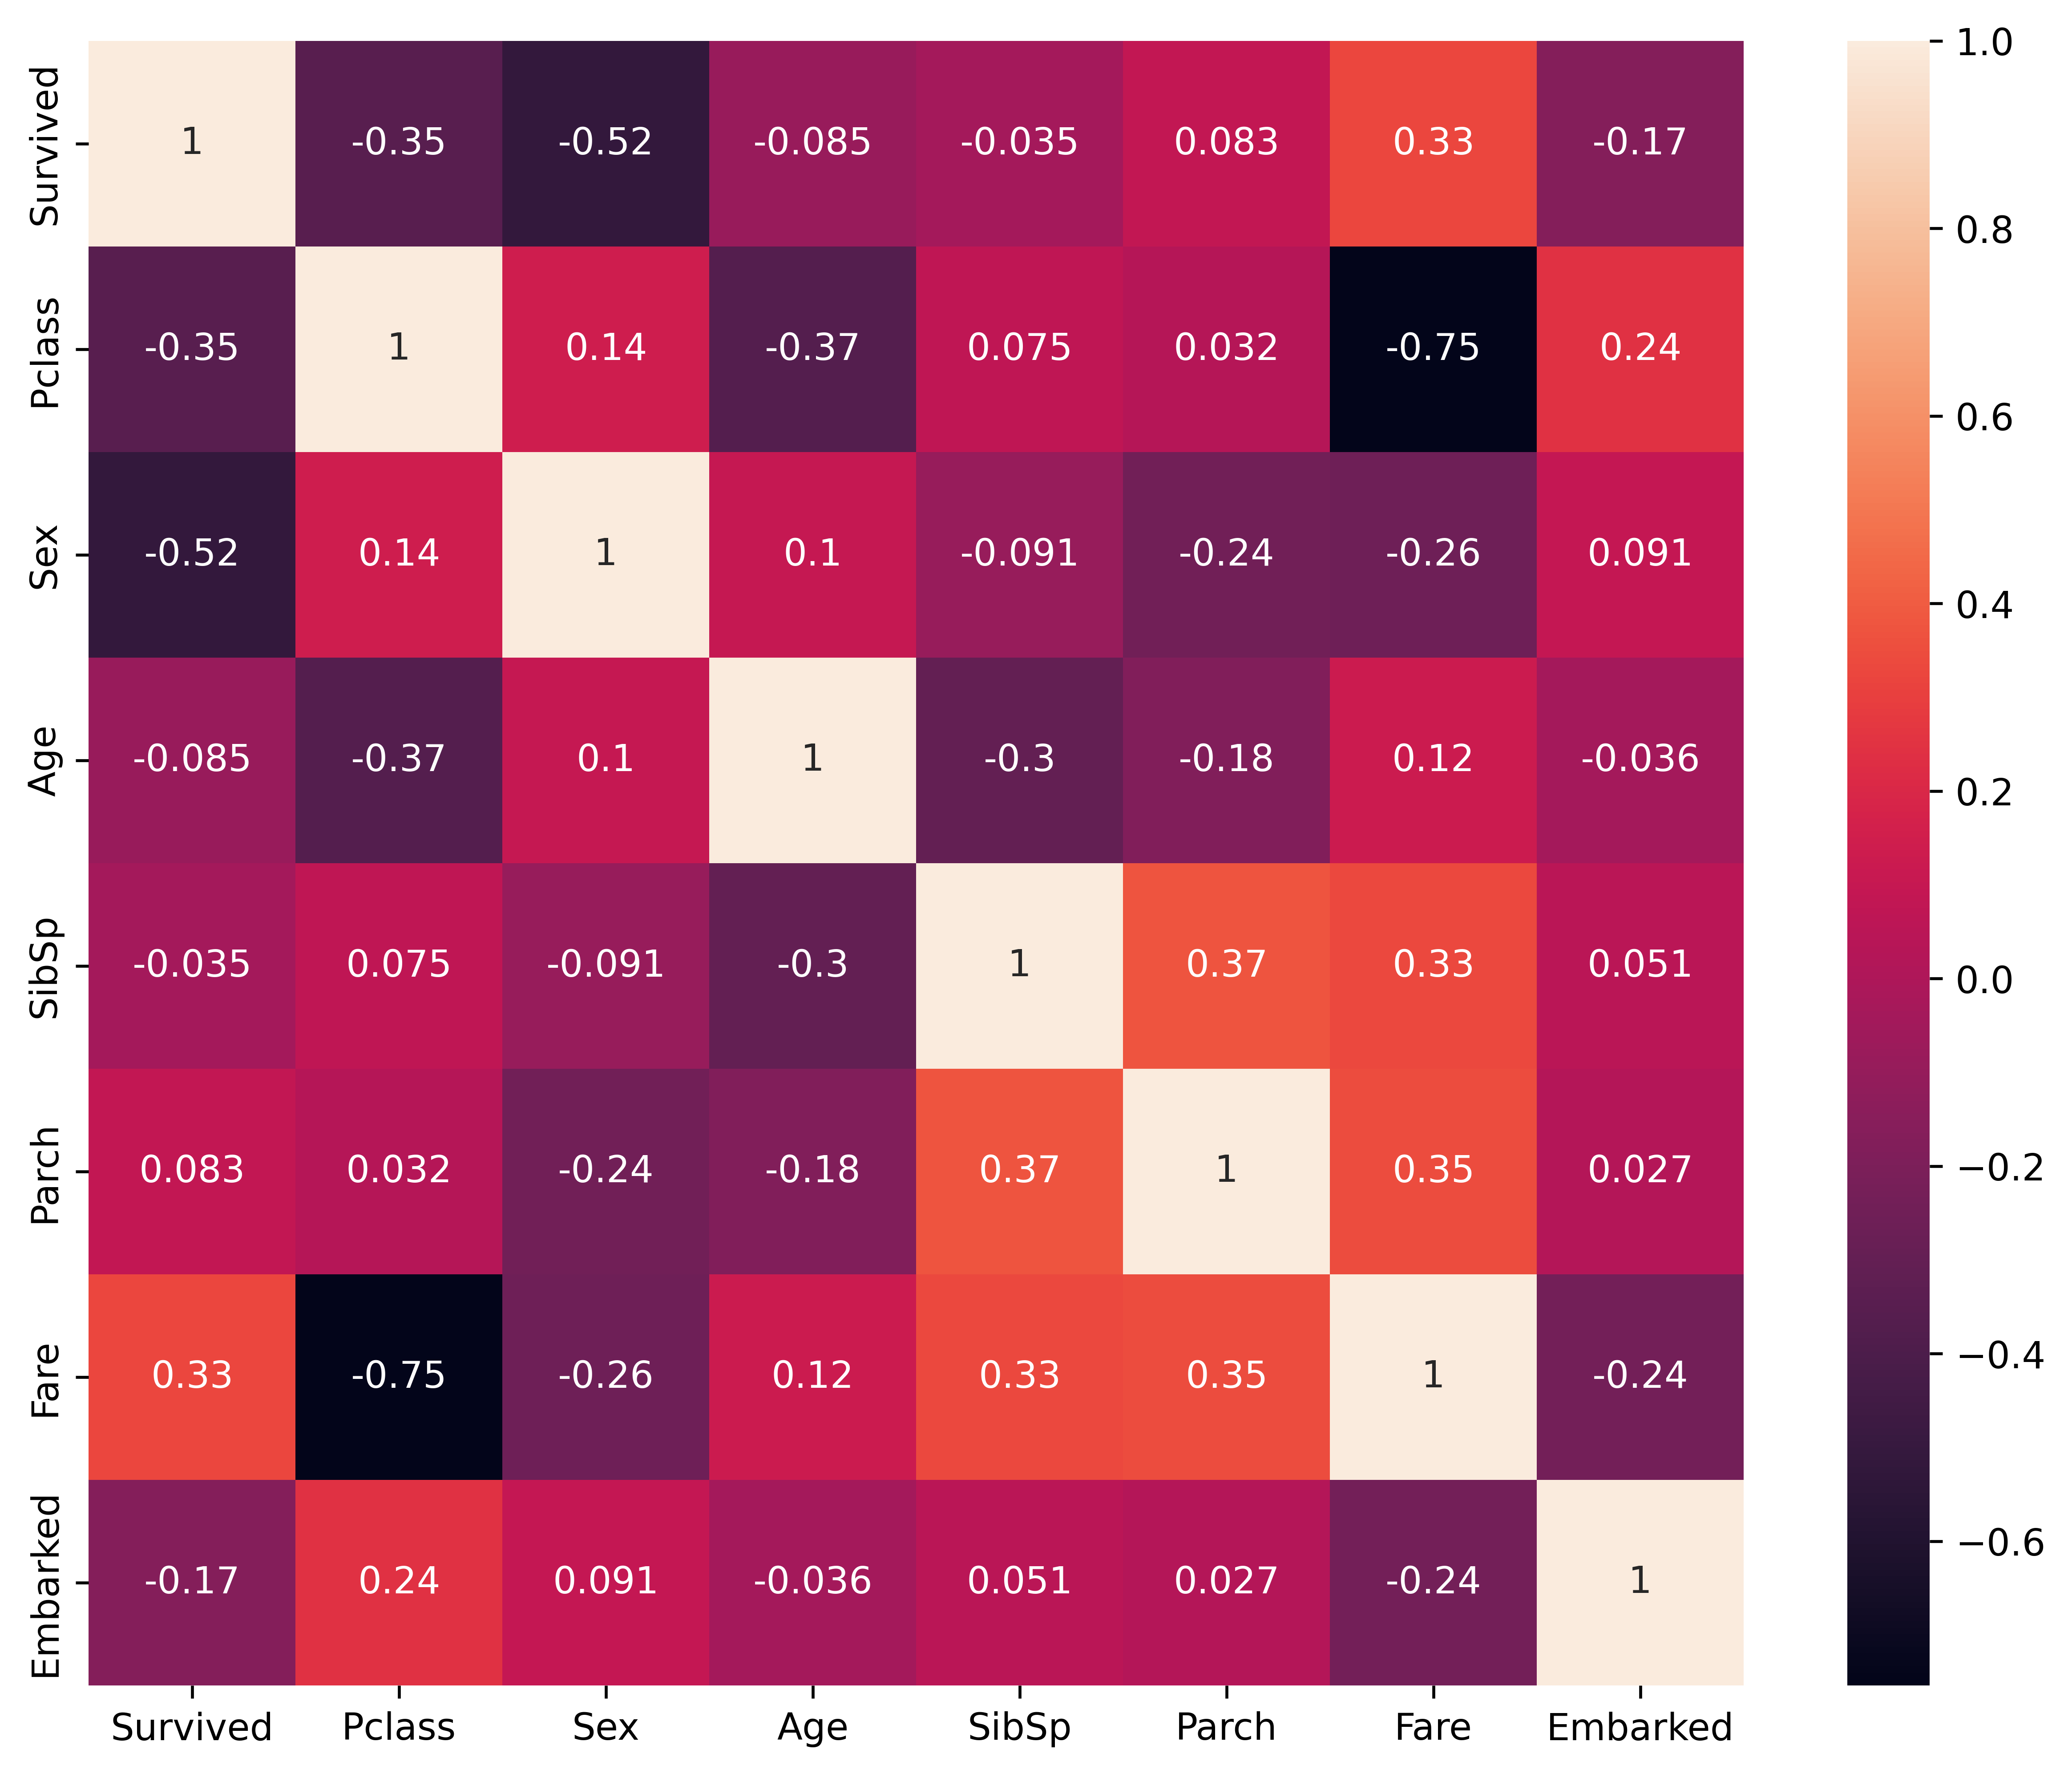

In [152]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Survived', ylabel='count'>

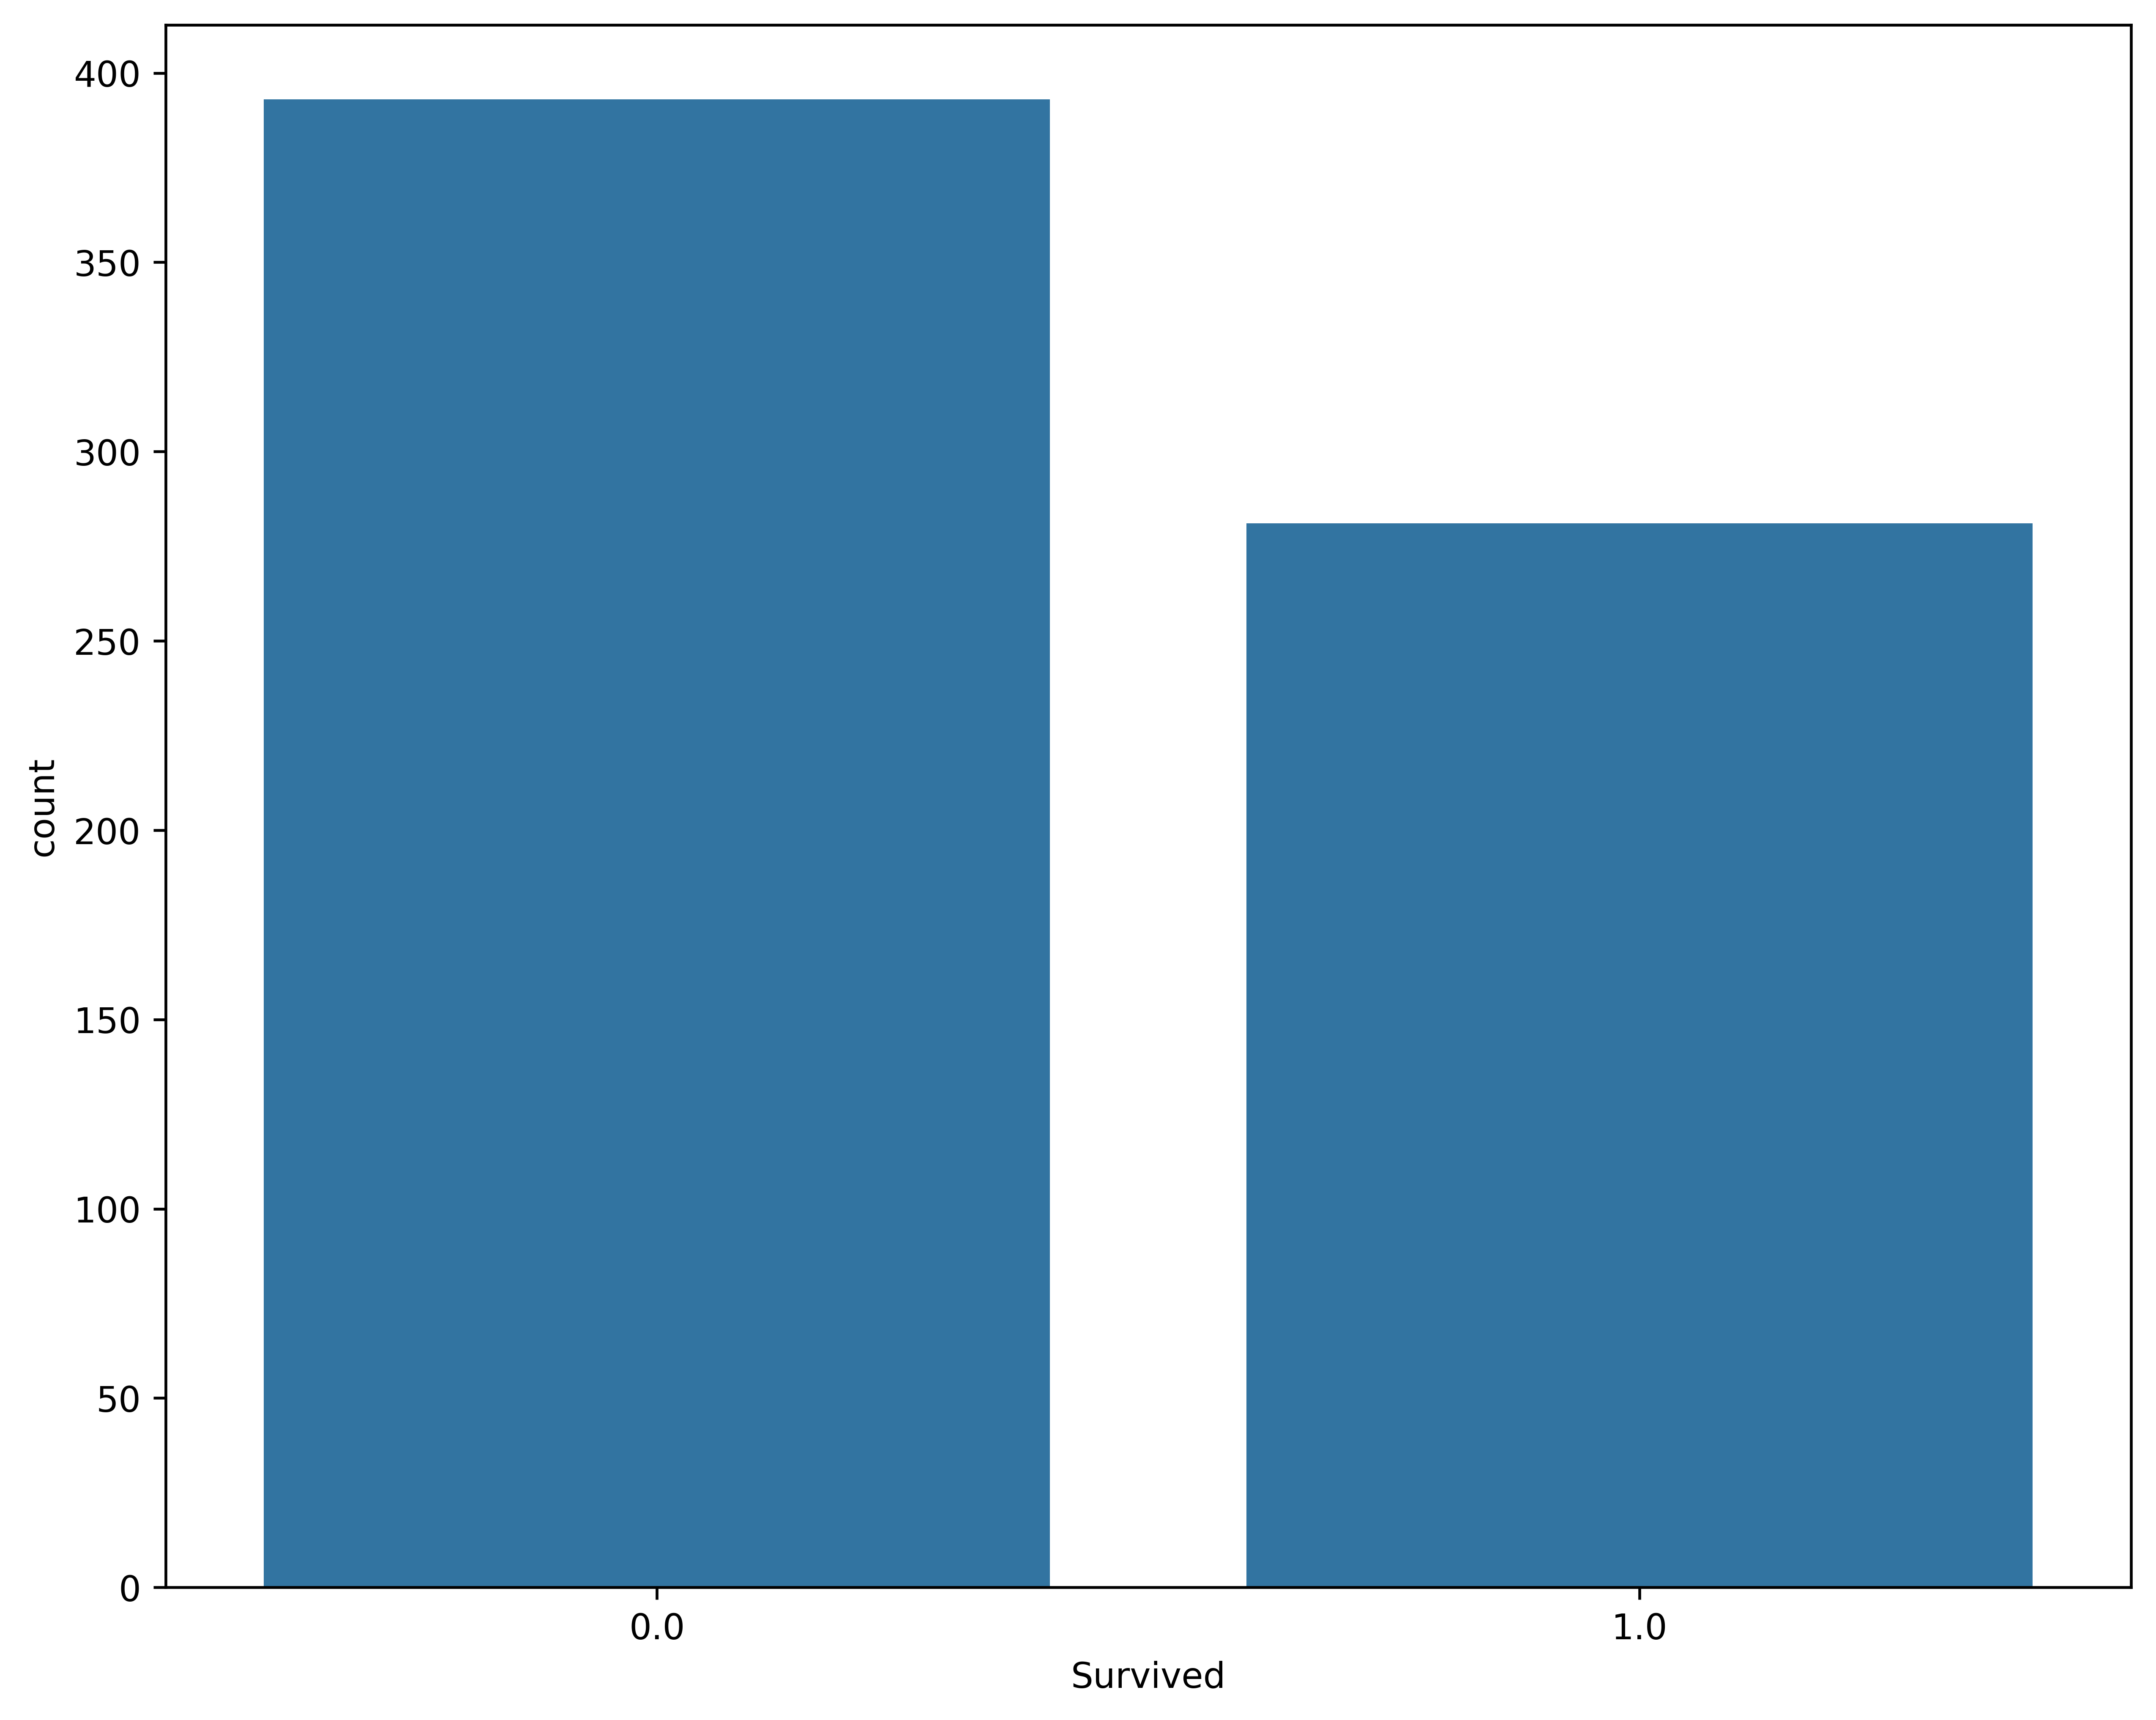

In [153]:
sns.countplot(x=df['Survived'])

In [154]:
x=df.iloc[:,1:]
x

Pclass  Sex   Age  SibSp  Parch   Fare  Embarked
0       2.0  1.0  28.0    1.0    0.0   18.0       2.0
1       0.0  0.0  51.0    1.0    0.0  207.0       0.0
2       2.0  0.0  34.0    0.0    0.0   41.0       2.0
3       0.0  0.0  47.0    1.0    0.0  189.0       2.0
4       2.0  1.0  47.0    0.0    0.0   43.0       2.0
..      ...  ...   ...    ...    ...    ...       ...
883     1.0  1.0  36.0    0.0    0.0   72.0       2.0
885     2.0  0.0  52.0    0.0    5.0  151.0       1.0
887     0.0  0.0  24.0    0.0    0.0  153.0       2.0
889     0.0  1.0  34.0    0.0    0.0  153.0       0.0
890     2.0  1.0  42.0    0.0    0.0   30.0       1.0

[674 rows x 7 columns]

In [155]:
y=df['Survived']
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
883    0.0
885    0.0
887    1.0
889    1.0
890    0.0
Name: Survived, Length: 674, dtype: float64

In [165]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [166]:
# Model Building

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# user Define function for model building

In [168]:
def prediction(model):
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print('Training Accuracy:',model.score(x_train,y_train))
  print('Testing Accuracy:',model.score(x_test,y_test))
  print("confusion matrix:",classification_report(y_test,y_pred))


In [169]:
prediction(DecisionTreeClassifier())

Training Accuracy: 0.9851576994434137
Testing Accuracy: 0.6962962962962963
confusion matrix:               precision    recall  f1-score   support

         0.0       0.77      0.74      0.75        85
         1.0       0.58      0.62      0.60        50

    accuracy                           0.70       135
   macro avg       0.68      0.68      0.68       135
weighted avg       0.70      0.70      0.70       135



In [ ]:
# Light gradient boost classifier

In [170]:
prediction(GradientBoostingClassifier())

Training Accuracy: 0.9128014842300557
Testing Accuracy: 0.7777777777777778
confusion matrix:               precision    recall  f1-score   support

         0.0       0.81      0.85      0.83        85
         1.0       0.72      0.66      0.69        50

    accuracy                           0.78       135
   macro avg       0.76      0.75      0.76       135
weighted avg       0.78      0.78      0.78       135



In [171]:
# single model gives High Training acuuracy and low testing accuracy

In [172]:
# Hyperparameter Tunning for Light Gradient Boost Classifier

In [173]:
params={'n_estimators': [90,100,150,180],
        'learning_rate':[0.2,0.4,0.6,0.9],
        'max_depth':[3,4,5,6,10]
}

In [174]:
grid=GridSearchCV(GradientBoostingClassifier(),param_grid=params,verbose=1)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.2, 0.4, 0.6, 0.9],
                         'max_depth': [3, 4, 5, 6, 10],
                         'n_estimators': [90, 100, 150, 180]},
             verbose=1)

In [175]:
grid.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}

In [176]:
prediction(GradientBoostingClassifier(learning_rate=0.2,max_depth=3,n_estimators=100))

Training Accuracy: 0.9461966604823747
Testing Accuracy: 0.8
confusion matrix:               precision    recall  f1-score   support

         0.0       0.83      0.86      0.84        85
         1.0       0.74      0.70      0.72        50

    accuracy                           0.80       135
   macro avg       0.79      0.78      0.78       135
weighted avg       0.80      0.80      0.80       135



In [ ]:
# XGBM

In [177]:
prediction(XGBClassifier())

Training Accuracy: 0.9814471243042672
Testing Accuracy: 0.762962962962963
confusion matrix:               precision    recall  f1-score   support

         0.0       0.81      0.81      0.81        85
         1.0       0.68      0.68      0.68        50

    accuracy                           0.76       135
   macro avg       0.75      0.75      0.75       135
weighted avg       0.76      0.76      0.76       135



In [178]:
# Hyperparameter tunning for XGBM

In [179]:
params={'n_estimators': [90,100,150,180],
        'learning_rate':[0.2,0.4,0.6,0.9],
        'max_depth':[3,4,5,6,10],
        'lambda':[1,3,2]
}

In [181]:
grid=GridSearchCV(XGBClassifier(),param_grid=params,verbose=1)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'lambda': [1, 3, 2],
                         'learning_rate': [0.2, 0.4, 0.6, 0.9],
                         'max_depth': [3, 4, 5, 6, 10],
                         'n_estimators': [90, 100, 150, 180]},
             verbose=1)

In [182]:
grid.best_params_

{'lambda': 1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150}

In [186]:
prediction(XGBClassifier(n_estimators=150,max_depth=3,learning_rate=0.2))

Training Accuracy: 0.9387755102040817
Testing Accuracy: 0.7851851851851852
confusion matrix:               precision    recall  f1-score   support

         0.0       0.81      0.86      0.83        85
         1.0       0.73      0.66      0.69        50

    accuracy                           0.79       135
   macro avg       0.77      0.76      0.76       135
weighted avg       0.78      0.79      0.78       135

